# Tips
* [Analiz](#1)
* [Görselleştirme](#2)

<a id="1"></a> <br>
## Analiz

In [1]:
# kütüphanelerin import edilmesi
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# veri setinin import edilip kullanıma hazır hale getirilmesi
tips = sns.load_dataset("tips")
df = tips.copy()

In [3]:
# veri setine ilk bakış
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Veri Setinin Hikayesi
**Restorana gelen müşterilerin özelliklerini ve ödediği ücretleri ele alan veri setidir.**
* **total_bill**: müşterinin ödediği toplam ücret (tip + yemek ücreti)
* **tip**: müşterinin bıraktığı bahşiş
* **sex**: müşterinin cinsiyeti
* **smoker**: müşterinin sigara içip içmeme durumu
* **day**: müşterinin restorana geldiği gün 
* **time**: müşterinin restorana geldiği öğün
* **size**: müşterinin restorana geldiği kişi sayısı

In [4]:
# veri setinin son 5 gözlemi
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [5]:
# veri setinin yapısal bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


* DataFrame
* 244 gözlemden oluşuyor
* 7 değişkenli bir veri seti (4 adet category, 2 adet float, 1 adet int)
* Bellekte kapladığı alan 7.3 KB

In [6]:
# veri setindeki değişkenlerin veri tipleri
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [7]:
# veri setinin gözlem ve değişken sayısı
df.shape
print(f"Veri setinde toplam {df.shape[0]} adet gözlem birimi ve {df.shape[1]} adet değişken var.")

Veri setinde toplam 244 adet gözlem birimi ve 7 adet değişken var.


In [8]:
# veri setindeki değişken isimleri
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [9]:
# veri setindeki betimsel istatistikler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


* en fazla bırakılmış bahşiş 10 dolar
* restorana gelen en büyük grup 6 kişiden oluşuyor
* ortalama ödenen ücret yaklaşık 20 dolar

In [11]:
# eksik değer var mı?
df.isnull().values.any() #eksik değer yok

False

In [12]:
# kategorik değişkenler
kat_df = df.select_dtypes(include = ["category"])
kat_df.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [32]:
# kategorik değişkenlerin sınıflarına erişmek
kat_df.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [33]:
# kategorik değişkenlerin sınıf sayısına erişmek
kat_df.day.value_counts().count()

4

In [34]:
# kategorik değişkenlerin sınıf frekansına erişmek
kat_df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

* en fazla müşteri cumartesi günü gelmiş
* en az müşteri cuma günü gelmiş
* genel olarak haftasonu daha yoğun

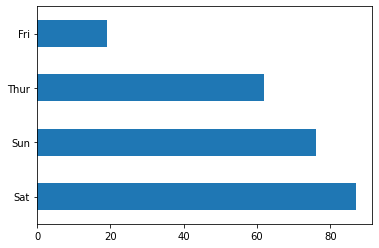

In [35]:
# kategorik değişkenlerin sınıf frekansını grafiğe dökmek
kat_df.day.value_counts().plot.barh();

In [37]:
# nümerik değişkenler
num_df = df.select_dtypes(include = ["float64","int64"])
num_df.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [38]:
# nümerik değişkenlerin betimsel istatistikleri
num_df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [39]:
# rapor
print(f"Ortalama bırakılan bahşiş: {num_df.tip.mean()}")
print(f"En az bırakılan bahşiş: {num_df.tip.min()}")
print(f"En fazla bırakılan bahşiş: {num_df.tip.max()}")

Ortalama bırakılan bahşiş: 2.9982786885245902
En az bırakılan bahşiş: 1.0
En fazla bırakılan bahşiş: 10.0


<a id="2"></a> <br>
## Görselleştirme

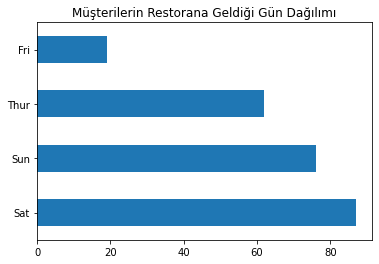

In [40]:
# kategorik değişkenin sınıflarının frekanslarını görselleştirmek
(df.day
 .value_counts()
 .plot.barh()
 .set_title("Müşterilerin Restorana Geldiği Gün Dağılımı")
);

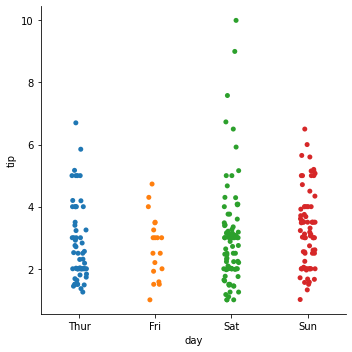

In [49]:
# veri setinde yer alan değişkenlerin birlikte değerlendirilmesi
sns.catplot(x = "day", y = "tip", data = df);
# catplot ile kategorik ve nümerik değişkenleri birbirleri ile ilişkisi var mı diye bakabilirsin.

* bahşiş verme konusunda müşterinin hangi gün geldiği pek önemli değil
* cumartesi günü daha fazla bahşiş bırakılıyor gibi

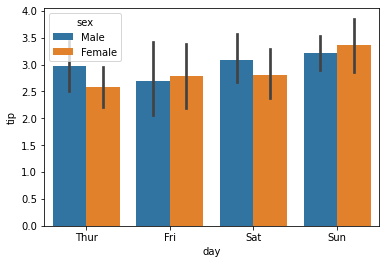

In [50]:
# grafiğe üçüncü bir boyut ekleyerek bilgiyi detaylandırmak
sns.barplot(x = "day", y = "tip", hue = "sex", data = df);

* kadın ve erkeklerin günlere göre verdikleri bahşişler arasında pek de bir fark yok.

In [51]:
# verinin sunduğu bilgiyi doğrulamak
df.groupby(["day","sex"])["tip"].mean()

day   sex   
Thur  Male      2.980333
      Female    2.575625
Fri   Male      2.693000
      Female    2.781111
Sat   Male      3.083898
      Female    2.801786
Sun   Male      3.220345
      Female    3.367222
Name: tip, dtype: float64

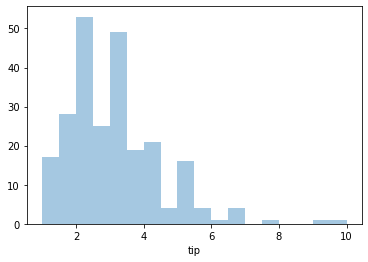

In [52]:
# nümerik değişkenin histogramı
sns.distplot(df.tip, kde = False);

* verilen bahşiş 1 dolar ile 5 dolar arasında daha yoğun

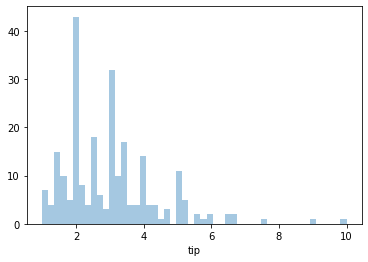

In [54]:
# nümerik değişkenin hassas histogramı
sns.distplot(df.tip, bins = 50, kde = False);

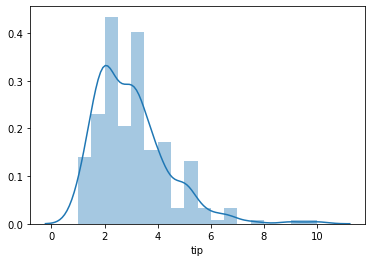

In [56]:
# histogram ve yoğunluk grafiği
sns.distplot(df.tip);

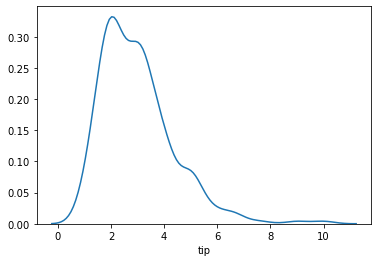

In [58]:
# yoğunluk grafiği
sns.distplot(df.tip, hist = False);

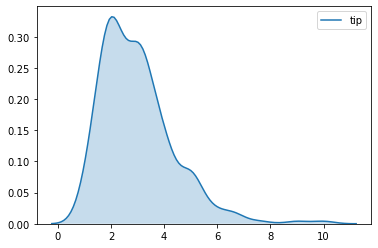

In [60]:
# karalı yoğunluk grafiği
sns.kdeplot(df.tip, shade = True);

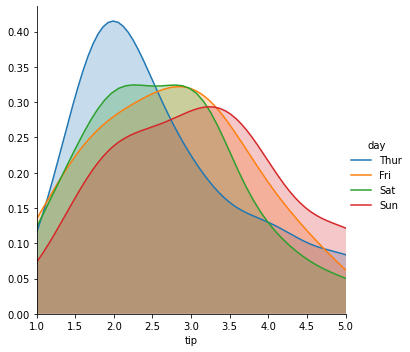

In [61]:
# grafiğe yakından ve daha detaylı bakmak
(sns
 .FacetGrid(df, 
            hue = "day", 
            height = 5, 
            xlim = (1, 5))
 .map(sns.kdeplot, "tip", shade = True)
 .add_legend()
);

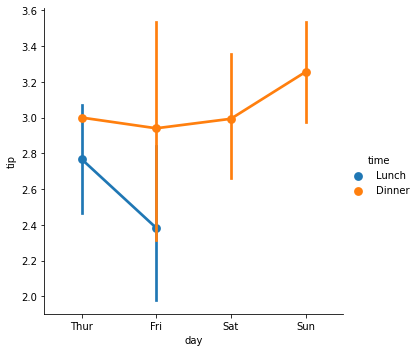

In [63]:
# noktalı üç boyutlu grafik
sns.catplot(x = "day", y = "tip", hue = "time", kind = "point", data = df);

* akşam yemeklerinde öğle yemeklerine göre daha çok bahşiş ödeniyor

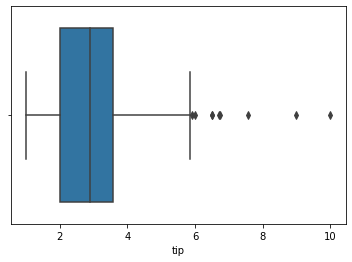

In [64]:
# kutu grafiği - yatay
sns.boxplot(x = df.tip);

* ortalamadan uzaklaşan bahşiş ücretleri bulunuyor

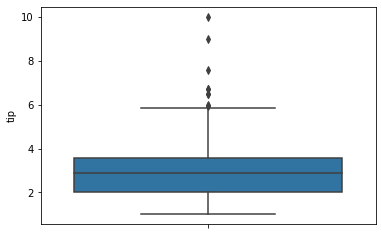

In [65]:
# kutu grafiği - dikey
sns.boxplot(x = df.tip, orient = "v");